TP2
=======

**Objectif:** Utiliser le logiciel SAGE pour calculer les coefficients du **DSF** (développement en série de Fourier) des fonctions **périodiques**, pour vérifier la convergence de la série de Fourier.


On utilisera markdown pour présenter un calcul codé en Latex.

Vous soumettrez dans EPREL le fichier au format `ipynb` en indiquant votre nom **dans le nom du fichier**.

### 1) Rappels théoriques

On a vu OML2 et OML3 la définition des coefficients de Fourier et leur application à l’approximation des fonctions périodiques.

Soit $f$ une fonction $T$-périodique et intégrable sur sa periode, on pose alors pour tout entier $n\in\mathbb{N}^*$:

$$
\begin{align}
    a_0 &=\frac{1}{T}\int_{-T/2}^{T/2} f(x)\,dx\\ 
    a_n &=\frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n\omega x)\,dx\\ 
    b_n &=\frac{2}{T}\int_{-T/2}^{T/2} f(x)\sin(n\omega x)\,dx 
\end{align}
$$


avec $\displaystyle\omega=\frac{2\pi}{T}$.

Le théorème de Dirichlet dit qu'aux points de continuité de la fonction $f$ on a
$$ f(x)=a_0+\sum_{n=1}^\infty a_n \cos(n\omega x)+ b_n \sin(n\omega x) $$

### 2) Consignes générales

Pour chaque fonction demandée vous devez:

1. Faire calculer les coefficients de Fourier par SAGE
2. Vérifier le calcul de SAGE en calculant les coefficients à la main et en rédigeant en Latex les calculs
3. Faire afficher par SAGE le graphique de la somme partielle $S_{10}(x)$ des 10 premiers coefficients de la série de Fourier pour vérifier s'il y a un début de convergence vers la fonction initiale.
4. Calculer la valeur efficace à la main et avec Sage, de deux manières (grâce à Parseval).
5. Calculer le TDH à la main et avec Sage.

Vous ferez ces calculs dans un nouveau notebook. La présentation du notebook sera largement prise en compte dans la notation. Veillez en particulier (et de manière non exhaustive):
* A écrire les titres de sections, dans un format adapté (police plus grande)
* A écrire un code Latex lisible (parenthèses et crochets adaptés en taille, retour à la ligne, etc...)
* A écrire des numéros de sous-section

Vous pouvez à cet effet vous inspirer librement de ce notebook. Un **aide-mémoire** des fonctions Sage se trouve tout en bas.

### 3) Un exemple: le triangle $2\pi$-periodique pair égal à $x$ sur $[0,\pi]$

Déclaration des variables:

In [1]:
var('n')
assume(n,'integer')
T=2*pi
omega=1

* 1- On fait calculer les coefficients de Fourier pour SAGE: quelques préliminaires,
    * Comme la fonction triangle $f$ est paire alors $$ a_0=\frac{2}{T}\int_0^\pi f(x)\,dx=\frac{2}{T}\int_0^\pi x\,dx $$
    * Comme la fonction triangle $f$ est paire et que pour tout entier naturel $n$ non nul la fonction $x\mapsto\sin(n\omega x)$ est impaire alors la fonction $x\mapsto f(x)\sin(n\omega x)$ est impaire donc $b_n=0$.
    * Comme la fonction triangle $f$ est paire et que pour tout entier naturel $n$ non nul la fonction $x\mapsto\cos(n\omega x)$ est paire alors la fonction $x\mapsto f(x)\cos(n\omega x)$ est paire donc
$$ a_n=\frac{4}{T}\int_0^\pi f(x)\cos(n\omega x)\,dx=\frac{4}{T}\int_0^\pi x\cos(n\omega x)\,dx $$

In [2]:
a0=(2/T)*integral(x,x,0,pi)
b(n)=0
a(n)=(4/T)*integral(x*cos(n*omega*x),x,0,pi)

show(a0)
show(factor(a(n)))

1/2*pi

2*((-1)^n - 1)/(pi*n^2)

* 2- On vérifie les calculs de SAGE:

$$\begin{align}
    a_0 &=\frac{2}{2\pi}\int_0^\pi x\,dx\\
        &=\frac{1}{\pi}\left[\frac{x^2}{2}\right]_0^\pi\\
        &=\frac{1}{\pi}\left(\frac{\pi^2}{2}-0\right)\\
        &=\frac{\pi}{2}
\end{align}$$

$$\begin{align} 
    a_n &=\frac{4}{2\pi}\int_0^\pi x\cos(nx)\,dx\\
        &=\frac{2}{\pi}\left( \left[x\frac{\sin(nx)}{n}\right]_0^\pi-\int_0^\pi\frac{\sin(nx)}{n}\,dx \right)\\
        &=\frac{2}{\pi}\left(0-0-\frac{1}{n}\left[\frac{-\cos(nx)}{n}\right]_0^\pi \right)\\
        &=\frac{2((-1)^n-1)}{\pi n^2}
\end{align}$$

* 3- Affichage du graphique de la somme partielle

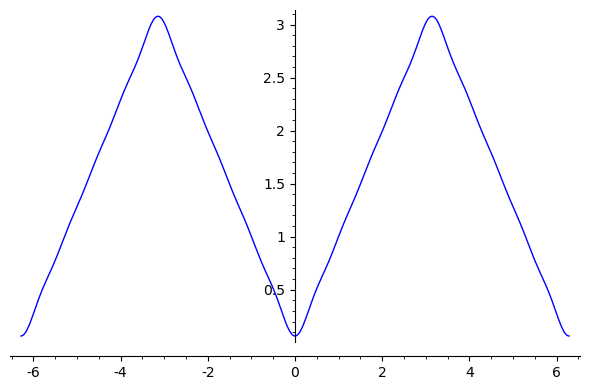

In [3]:
S(x)=a0+sum(a(n)*cos(n*omega*x),n,1,10)
plot(S(x),(-2*pi,2*pi))

* 4- Calcul de la valeur efficace

La définition de la valeur efficace d'une fonction $x(t)$ est :

$$\begin{align}
    x_{eff} &= \sqrt{ \frac{1}{T}\int_{[T]} \vert x(t) \vert^2 \,dt }\\
\end{align}$$


On dispose également de l'égalité de Parseval qui dit que:

$$\begin{align}
    \frac{1}{T}\int_{[T]} \vert x(t) \vert^2 &= a_0^2 + \frac{1}{2} \sum_{n=1}^{+\infty} \Big( a_n^2 + b_n^2\Big) \\
\end{align}$$

En utilisant les calculs SAGE ci-dessus, on en déduit le calcul de $x_{eff}$ par les 2 méthodes (par l'intégrale puis par la somme des coefficients de la DSF).

Par l'intégrale temporelle à la main:

$$\begin{align}
    x_{eff} &= \sqrt{ \frac{1}{T}\int_{[T]} \vert x(t) \vert^2 \,dt }\\
            &= \sqrt{  \frac{1}{2\pi}\int_{-\pi}^\pi t^2 \,dt }\\ 
            &= \sqrt{  \frac{2}{2\pi}\int_0^{\pi} t^2 \,dt }\\ 
            &= \sqrt{  \frac{1}{\pi} [\frac{1}{3} t^3 ]_0^{\pi} \,dt }\\ 
            &= \sqrt{  \frac{1}{3\pi} ( \pi^3 -0 )}\\ 
            &= \frac{\pi}{\sqrt{3}} \\ 
            &\approx 1,81 \\ 
\end{align}$$


Par l'intégrale temporelle avec SAGE:

In [3]:
xeff_sq=2*(1/T)*integral(abs(x)^2,x,0,pi)
xeff = sqrt(xeff_sq)
print(xeff)
print(N(xeff))

1/3*pi^2
3.28986813369645


On utilise ensuite la méthode par la somme des coefficients de la DSF:

In [4]:
xeff_sq= a0^2 + 1/2*sum(a(n)^2+b(n)^2,n,1,oo)
print(xeff_sq)

1/4*pi^2 - 2*sum(2*((-1)^n - 1)/n^4, n, 1, +Infinity)/pi^2


On voit donc que Sage n'arrive pas à simplifier, on fait une troncature et on demande une évaluation numérique avec `N()`:

In [6]:
print(N(a0^2 + 1/2*sum(a(n)^2+b(n)^2,n,1,1000))) # troncature


3.28986813356136


On retrouve bien le même résultat numérique que ci-dessus, mais on veut une expression symbolique. On remplace le terme $(-1)^n-1$ par $0$ pour les termes $n$ pairs, et $-2$ pour les termes $n$ impairs:

In [15]:
k = var('k')
simplify(1/4*pi^2 + 8/pi^2*sum(1/(2*k+1)^4, k, 0, +Infinity))

1/3*pi^2

* 5- Taux de distorsion harmonique (TDH)

Dans le cours on a vu que pour les fonctions impaires, le TDH s'exprimait:

$$\begin{align}
    TDH &= 100 \frac{ \sqrt{ \sum_{n=2}^{+\infty} b_n^2 }}{b_1} \\
\end{align}$$

Comme ici on a une fonction paire, on adapte la définition et on calcule:
$$\begin{align}
    TDH &= 100 \frac{ \sqrt{ \sum_{n=2}^{+\infty} a_n^2 }}{\vert a_1\vert } \\
\end{align}$$

Rappel: pour un cos pur, le TDH doit valoir 0\%    

Commençons par le **calcul à la main**:

$$\begin{align}
    TDH &= 100 \frac{ \sqrt{ \sum_{n=2}^{+\infty} a_n^2 }}{\vert a_1\vert } \\
    &= 100 \frac{ \sqrt{ \sum_{n=2}^{+\infty} \Bigg( \frac{2}{\pi} \frac{((-1)^n-1)}{n^2} \Bigg)^2 }}{ \frac{4}{\pi}} \\
\end{align}$$

On remonte le dénominateur $\frac{4}{\pi}$, puis on sort la constante $ \frac{2}{\pi}$ de la parenthèse au carré:

$$\begin{align}
    TDH &= 100  \frac{2}{\pi} \frac{\pi}{4}  \sqrt{ \sum_{n=2}^{+\infty} \Bigg( \frac{((-1)^n-1)}{n^2} \Bigg)^2 }\\
\end{align}$$

Le terme $(-1)^n-1$ s'annule pour pout $n$ pair. Il ne reste que les termes impairs en $n=2k+1$ dans la somme:

$$\begin{align}
    TDH &= 100  \frac{1}{2}   \sqrt{ \sum_{k=1}^{+\infty} \Bigg( \frac{-2}{(2k+1)^2} \Bigg)^2 }\\
\end{align}$$

On fait sortir le $2$ sous la parenthèse. La somme $\sum_{k=0}^{+\infty} \frac{1}{(2k+1)^4}$ est connue et vaut $\frac{\pi^4}{96}$, on peut d'ailleurs la calculer avec Sage si on ne la connaît pas: `sum( 1/(2*k+1)^4,k,0,oo)`. On en déduit  $\sum_{k=1}^{+\infty} \frac{1}{(2k+1)^4} = \frac{\pi^4}{96}-1$. D'où:

$$\begin{align}
    TDH &= 100    \sqrt{ \frac{\pi^4}{96}-1 }\\
       &\approx 12,11 \%
\end{align}$$


Puis vérifions ce calcul **avec Sage**:

In [18]:
100 * sqrt(sum(a(n)^2,n,2,oo))/abs(a(1))

50*pi*sqrt(-sum(2*((-1)^n - 1)/n^4, n, 2, +Infinity)/pi^2)

On voit donc que Sage n'arrive pas à simplifier, on fait une troncature et on demande une évaluation numérique avec `N()`:

In [21]:
N(100 * sqrt(sum(a(n)^2,n,2,1000))/abs(a(1)))

12.1152925831470

On remplace le terme $(-1)^n-1$ par $0$ pour les termes $n$ pairs, et $-2$ pour les termes $n$ impairs:

In [28]:
TDH=100*sqrt(simplify(16/pi^2*sum(1/(2*k+1)^4, k, 1, +Infinity)))/abs(a(1))
show(TDH)

25*sqrt(1/6)*sqrt(pi^4 - 96)

In [29]:
N(TDH)

12.1152926519304

On retrouve bien un résultat proche de l'évaluation numérique par troncature de la somme.

### 4) Travail demandé

Rappel:

* signal $x(t)$ pair: symétrie axiale par rapport à l'axe des ordonnées $y$, c'est à dire $\forall t, ~x(t)=x(-t)$
* signal $x(t)$ impair: symétrique centrale par rapport à l'origine O, c'est à dire $\forall t, ~x(-t)=-x(t)$

Dans un nouveau notebook, traiter de manière similaire les fonctions suivantes:

* La dent de scie $2\pi$-periodique égale à $x$ sur $]-\pi,\pi]$.
* Le créneau $2\pi$-periodique impair égal à $1$ sur $]0,\pi[$.
* La parabole $2$-periodique égale à $x^2$ sur $]-1,1]$.




Annexe
------

<h3>Rappel Sage</h3>
    
||Sage|Example|
|---|---|---|    
|carré| `x^2`||
|racine| `sqrt(x)`||
|évaluation numérique|`N(...)`|`N(sin(pi/6))`|
|valeur absolue|`abs()`||
|infini| `infinity` ou `oo`|    |
|Dérivée|`f(t).diff(t)`||    
|Dérivée seconde|`f(t).diff(t,2)`||    
|somme| `sum( a(n),n,n_start,n_stop)`  | `n=var('n');sum( 1/n^2,n,1,10)`    |
|somme infinie| `sum( a(n),n,n_start,n_stop)`  | `n=var('n'); sum( 1/n^2,n,1,oo)`    |
|||    |

<h3>Références</h3>
    
    
* https://cpjobling.github.io/eg-247-textbook/labs/lab03/index.html
* https://www.engr.colostate.edu/ECE423/signals_labs/lab04/Lab_Notes_4.pdf
* https://people.eecs.ku.edu/~perrins/class/S08_360/lab/lab11.pdf
* https://lpsa.swarthmore.edu/LaplaceZTable/LaplaceZFuncTable.html  